In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
import itertools
from sklearn.model_selection import train_test_split

In [2]:
columns=['user','item','rating','timestamp']
df=pd.read_csv("u.data",names=columns,sep='\t',header=None).drop(['timestamp'],axis =1)
df.head()

,user,item,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


Now we check for missing values 

In [3]:
print('No of Nan values =',sum(df.isnull().any()))

No of Nan values = 0


1) Showcase how the ratings vary across users, as an example consider whether the plot is able to tell if most ratings are only from a handful of users.


In [4]:
print("№ of Ratings:",len(df.rating))
print("№ of Users:", len(np.unique(df.user)))
print("№ of Items:", len(np.unique(df.item)))

№ of Ratings: 100000
№ of Users: 943
№ of Items: 1682


Lets now see the distribution of ratings across users 

In [5]:
df.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

Most users gave the rating of 4 and we can plot this on a histogram

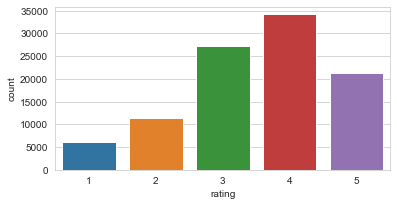

In [6]:
fig,ax=plt.subplots(figsize=(6, 3))
sns.countplot(df.rating)
plt.show()

Now we analyse total on the ratings given by users 

In [7]:
rating_total=df.groupby(by='user')['rating'].count().sort_values(ascending=False)

In [8]:
rating_total.head()

user
405    737
655    685
13     636
450    540
276    518
Name: rating, dtype: int64

We can see user 405 gave the highest number of ratings 

We can plot a graph showing the distribution of ratings by each user 

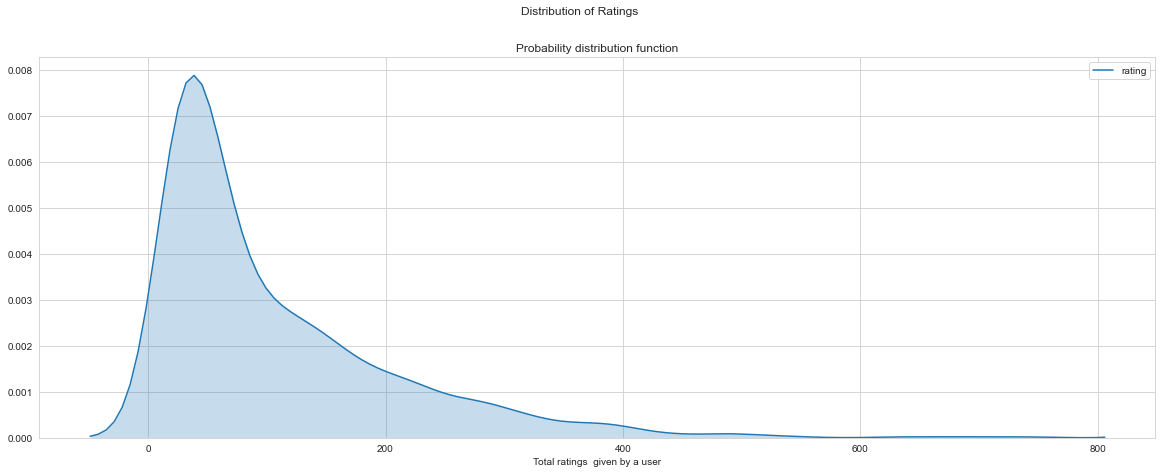

In [9]:
fig=plt.figure(figsize=(20,7))
ax1=plt.subplot()
sns.kdeplot(rating_total,shade=True,ax=ax1)
plt.xlabel('Total ratings  given by a user')
plt.title('Probability distribution function')

fig.suptitle('Distribution of Ratings')
plt.show()

Now we will do analyis of ratings per item.

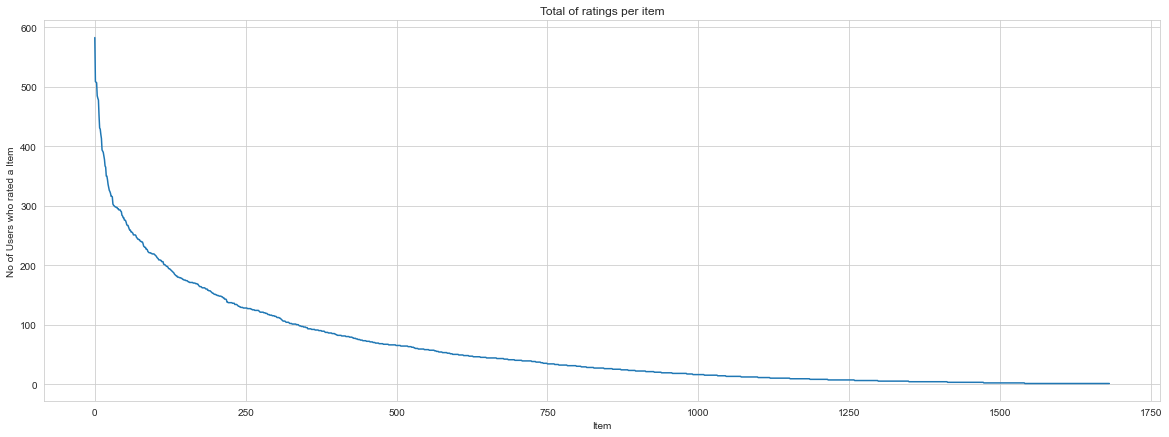

In [10]:
rating_total_for_item=df.groupby(by='item')['rating'].count().sort_values(ascending=False)

fig=plt.figure(figsize=(20,7))
plt.plot(rating_total_for_item.values)
plt.title('Total of ratings per item')
plt.xlabel('Item')
plt.ylabel('No of Users who rated a Item')
ax.set_xticklabels([])

plt.show()

The graph  shows that some items between (0 and 300) are rated by a huge number of users.

We check how users and items now affects the rating and see if there is a difference

In [11]:
df1=pd.read_csv("u.user",sep='|',names = ['user','age','gender','occupation','zip code'],header=None)
df1.head()

,user,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [12]:
df2=pd.read_csv("u.item",sep='|',
            header = None,
            encoding='latin-1',
            names = ['item','movie title','release date','video release date','IMDb URL','unknown',
                     'Action','Adventure','Animation','Childrens','Comedy','Crime', 'Documentary',
                     'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
                     'Thriller','War','Western'])
df2.head()

,item,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now we merge all dataframes to do our analysis

In [13]:
df_merge=pd.merge(pd.merge(df1,df),df2)
df_merge.head()

,user,age,gender,occupation,zip code,item,rating,movie title,release date,video release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,Three Colors: White (1994),01-Jan-1994,NaN,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,Three Colors: White (1994),01-Jan-1994,NaN,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,Three Colors: White (1994),01-Jan-1994,NaN,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,Three Colors: White (1994),01-Jan-1994,NaN,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,Three Colors: White (1994),01-Jan-1994,NaN,...,0,0,0,0,0,0,0,0,0,0


We can analyse users by their occupations

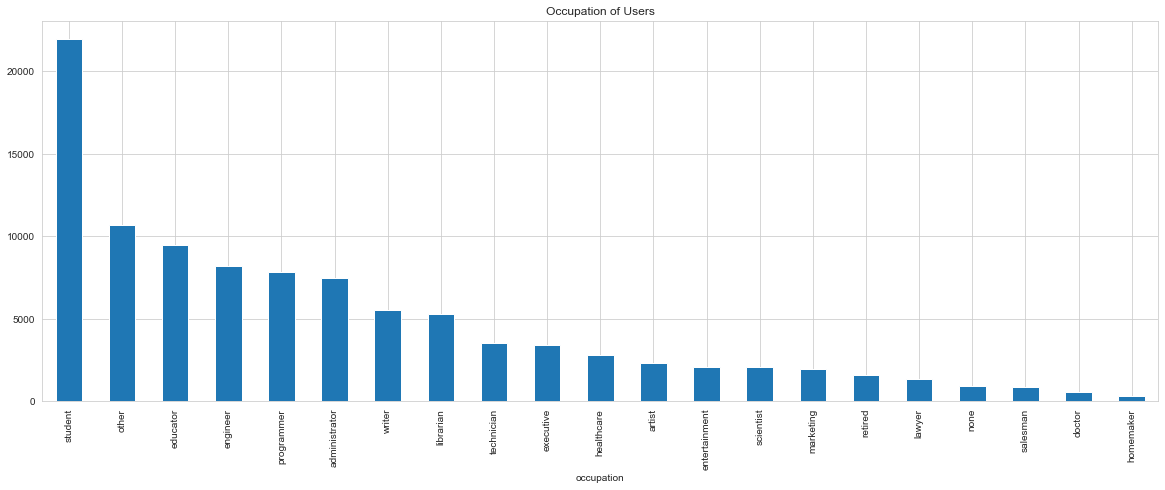

In [14]:
fig = plt.figure(figsize=(20,7))
df_merge.groupby(by='occupation')['rating'].count().sort_values(ascending=False).plot.bar()
plt.title('Occupation of Users')
plt.show()

As we see from the plot, most of the movies are rated by students so students should be targeted more during adverts for new movies

Let's analyze Genre of movies

In [15]:
genre= df_merge[['Action','Adventure','Animation','Childrens','Comedy','Crime', 'Documentary','Drama','Fantasy',
           'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]

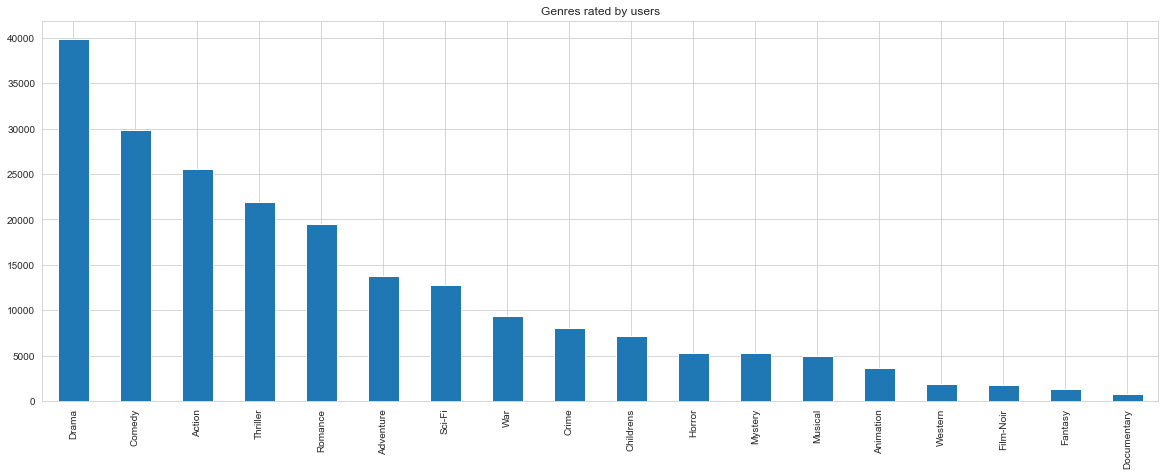

In [16]:
fig=plt.figure(figsize=(20,7))
genre.sum().sort_values(ascending=False).plot.bar()
plt.title('Genres rated by users')
plt.show()

Drama movies are most rated and documentaries are least 


4) What age groups prefer what genres based on ratings?You can bin respective ages to your preference.

In [17]:
#we group the ages in 10's  and each age group shows the total counts of ratings given
ages=[0,10,20,30,40,50,60,70,80,90]
df_merge.age.groupby(pd.cut(df_merge.age, ages)).count()

age
(0, 10]        74
(10, 20]    12239
(20, 30]    39208
(30, 40]    23775
(40, 50]    15246
(50, 60]     8247
(60, 70]     1155
(70, 80]       56
(80, 90]        0
Name: age, dtype: int64

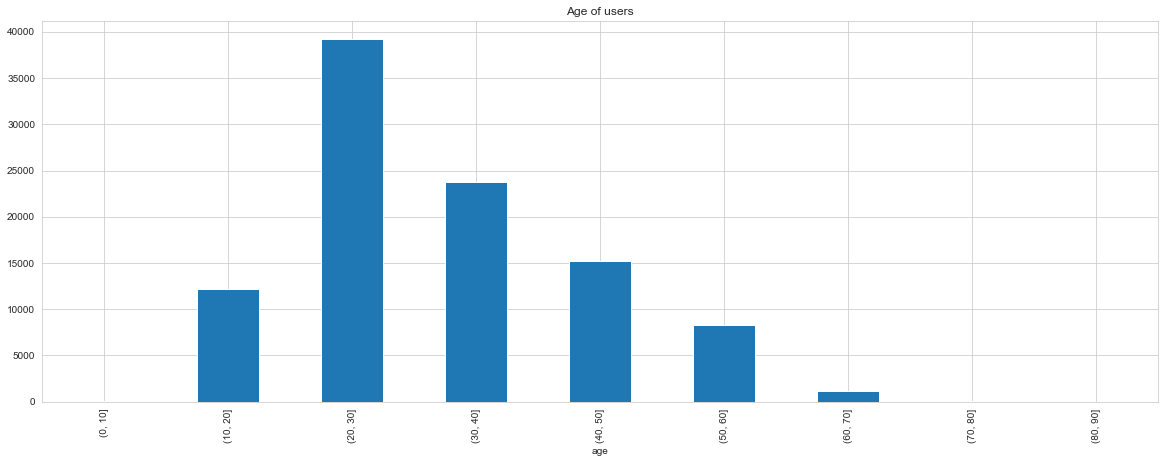

In [18]:
fig=plt.figure(figsize=(20,7))
df_merge.age.groupby(pd.cut(df_merge.age, ages)).count().plot.bar()
plt.title('Age of users')
plt.show()

Age group between (20:30) had the most ratings of all the movies

In this task we will try to usee MF to predict how a user will rate a new movie based on a previous rating and try a predict a new movie reccomendation to them. To solve this problem we nee to find some latent features that can determine the ratinfg a user will give to a particular movie with feautures such as actors, genre etc.

Now, we have U number of users, D number of items, and column R of size  𝑈∗𝐷
U
∗
D
  - matrix that contains all the ratings. We want to find out K latent features. Our aim is find two (or more) matrices P and Q such that their product approximates to R. Here P is of size  𝑈∗𝐾
U
∗
K
  and Q is of size  𝐷∗𝐾
D
∗
K
 . Matrix  𝑅=𝑃∗𝑄𝑇
R
=
P
∗
Q
T
 
Matrix  𝑃=𝑈∗𝐾
P
=
U
∗
K
  shows "the strength of the associations between a user and the features"

Matrix  𝑄=𝐷∗𝐾
Q
=
D
∗
K
  shows "the strength of the associations between an item and the features"
  
To get the prediction of a rating of an item  𝑑𝑗
d
j
  by user  𝑢𝑖
u
i
 , we can calculate the dot product of their vectors

We need to create a sparse matrix.

In [28]:
U=df.user.unique().shape[0]
D=df.item.unique().shape[0]
N=np.zeros((U,D))

In [29]:
for row in df.itertuples():
    N[row[1]-1,row[2]-1]=row[3]

Normalizing the matrix

In [30]:
ave_cols = np.mean(N, axis=0)
std_cols = N.std(axis=0)

In [31]:
R= (N - ave_cols)/std_cols


In [32]:
#the normalized matrix is called R
R

array([[ 1.53896982,  2.19188112,  3.84109575, ..., -0.03258176,
        -0.03258176, -0.03258176],
       [ 1.0490142 , -0.38214615, -0.29969109, ..., -0.03258176,
        -0.03258176, -0.03258176],
       [-0.91080827, -0.38214615, -0.29969109, ..., -0.03258176,
        -0.03258176, -0.03258176],
       ...,
       [ 1.53896982, -0.38214615, -0.29969109, ..., -0.03258176,
        -0.03258176, -0.03258176],
       [-0.91080827, -0.38214615, -0.29969109, ..., -0.03258176,
        -0.03258176, -0.03258176],
       [-0.91080827,  3.90789929, -0.29969109, ..., -0.03258176,
        -0.03258176, -0.03258176]])

Splitting matrix into train,test and validation

In [33]:
Train = R[:int(len(R)*0.8)]
Test = R[int(len(R)*0.8):int(len(R)*0.9)]
Val = R[int(len(R)*0.9):]


We use a row column index to build the matrix of our training samples 

In [34]:
Ri_Ci_V=[(r,c,Train[r][c]) for r in range(Train.shape[0]) for c in range(Train.shape[1])if Train[r][c]>0]

Here is the function for matrix factorization using SGD

Reference : http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/

In [35]:
def MF_SGD(train,test,val,K,alpha,beta,epochs,track):
    
    RMSE_train=[]
    RMSE_test=[]
    RMSE_val=[]
    
    P=np.random.rand(R.shape[0],K)
    Q=np.random.rand(R.shape[1],K)
    u_b=np.zeros(R.shape[0])
    i_b=np.zeros(R.shape[1])
    g_b=np.mean(R[np.where(R!=0)])

    np.random.shuffle(Ri_Ci_V)
    
    for itr in range(epochs):
        for u,i,r in Ri_Ci_V:
            err=R[u][i]-np.dot(P[u,:],Q[i,:].T)
            u_b[u]=u_b[u]+alpha*(err-beta*u_b[u])
            i_b[i]=i_b[i]+alpha*(err-beta*i_b[i])
            P[u,:]=P[u,:]+alpha*(2*err*Q[i,:]-beta*P[u,:])
            Q[i,:]=Q[i,:]+alpha*(2*err*P[u,:]-beta*Q[i,:])
        if track :
            predictions=predict(g_b,u_b,i_b,P,Q)
            RMSE_train.append(RMSE(predictions,train))
            RMSE_test.append(RMSE(predictions,test))
            RMSE_val.append(RMSE(predictions,val))
    if not track:
        predictions=predict(g_b,u_b,i_b,P,Q)
        RMSE_train.append(RMSE(predictions,train))
        RMSE_test.append(RMSE(predictions,test))
        RMSE_val.append(RMSE(predictions,val))
    return g_b,u_b,i_b,P,Q,RMSE_train,RMSE_test,RMSE_val

def predict(mu,u_b,i_b,P,Q):
    predictions = np.zeros(R.shape)
    for u in range(R.shape[0]):
        for i in range(R.shape[1]):
                predictions[u,i]=mu+u_b[u]+i_b[i]+np.dot(P[u,:],Q[i,:].T)
    return predictions

In [36]:
#function to calculate the RMSE 
def RMSE(y_hat,y):
    y_hat=np.ravel(y_hat[y.nonzero()])
    y=np.ravel(y[y.nonzero()])
    return np.sqrt(np.mean((y_hat-y)**2))

In [37]:
_,_,_,_,_,RMSE_train,RMSE_test,RMSE_val=MF_SGD(Train,Test,Val,50,0.001,0.01,20,True)

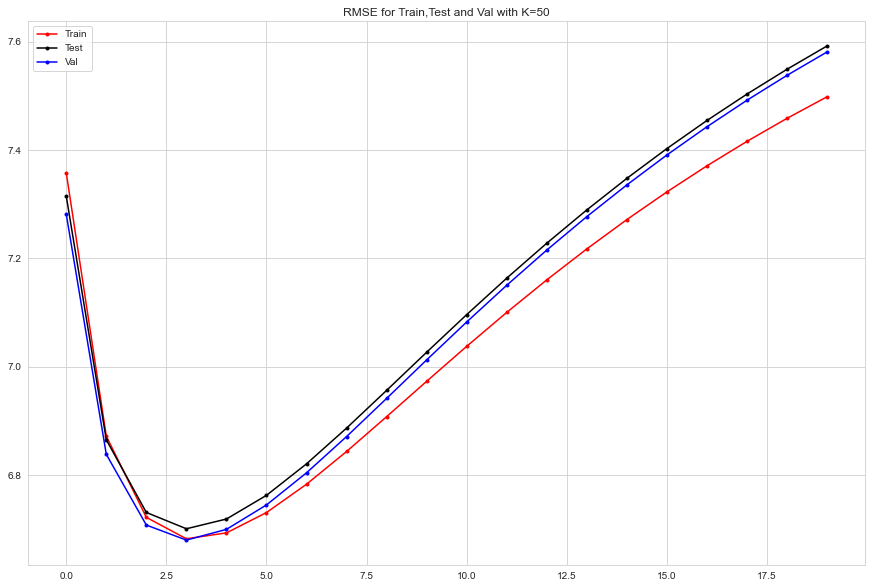

In [39]:
fig,ax=plt.subplots(figsize=(15, 10))
plt.title("RMSE for Train,Test and Val with K=50")
ax.plot(RMSE_train,'r.-')
ax.plot(RMSE_test,'k.-')
ax.plot(RMSE_val,'b.-' )
ax.legend(['Train','Test','Val'])

We compute the mean value of the RMSE of the validation set

In [43]:
print(np.mean(RMSE_val))

7.1046594512382075


In [44]:
grid[np.nanargmin(RMSE_val)]

(2, 0.001, 0.1)

In [45]:
print(np.mean(RMSE_test))

7.120819156583366


In [46]:
grid[np.nanargmin(RMSE_test)]

(2, 0.001, 0.1)

The parameters with the lowest RMSE are K = 2, lamda = 0.1, alpha = 0.001

 Recommender Systems using matrix factorization libmf/sckit-learn

In [47]:

from sklearn.decomposition import NMF

In [ ]:
we create a new train,test and val data that is not normalized so the SKlearn implementtion 

In [50]:
Train1 = N[:int(len(N)*0.8)]
Test1 = N[int(len(N)*0.8):int(len(N)*0.9)]
Val1 = N[int(len(N)*0.9):]


In [51]:
sk_nmf=NMF(n_components=2,solver='cd',max_iter=10,alpha=0.001,l1_ratio=0.01,verbose=1)
W=sk_nmf.fit_transform(Train1)
H=sk_nmf.components_

violation: 1.0
violation: 0.5809407380083438
violation: 0.3457250635779871
violation: 0.22421694251267635
violation: 0.16401762253805077
violation: 0.12921175030721888
violation: 0.10681907426763158
violation: 0.09141770740924261
violation: 0.08083682564405206
violation: 0.0731814725582957


/Users/zuzelka/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 10 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [52]:
print('Trainset RMSE =',np.around(RMSE(np.dot(W,H),Train1),2))
print('Testset RMSE =',np.around(RMSE(np.dot(W,H),Test1),2))
print('Testset RMSE =',np.around(RMSE(np.dot(W,H),Val1),2))

Trainset RMSE = 2.64
Testset RMSE = 3.15
Testset RMSE = 3.14


Performing Grid Search and Kfold cross validation, using the same grid 

In [53]:
def cross_validation(d,grid,k_folds):
    
    RMSE_mean=[]
    
    indeces=np.arange(0,d.shape[0])
    batch=np.array_split(indeces,k_folds)
    
    for i in grid:
        
        rmse_k=[]
        
        for k in range(k_folds):
            cv_tr=np.zeros(R.shape)
            cv_te=np.zeros(R.shape)
            tr_set=np.take(d,np.ravel(batch[~k]),axis=0)
            cv_set=np.take(d,np.ravel(batch[k]),axis=0)
            for row in cv_set.itertuples():
                cv_tr[row[1]-1,row[2]-1]=row[3]
            for row in tr_set.itertuples():
                cv_te[row[1]-1,row[2]-1]=row[3]
            sk_nmf=NMF(n_components = i[0],solver='cd',max_iter=200,alpha=i[1],l1_ratio=i[2])
            W=sk_nmf.fit_transform(cv_tr)
            H=sk_nmf.components_
            rmse_k.append(RMSE(np.dot(W,H),cv_te))
        RMSE_mean.append(np.mean(rmse_k))
    return RMSE_mean

In [54]:
RMSE1=cross_validation(df,grid,3)

/Users/zuzelka/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/zuzelka/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/zuzelka/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/zuzelka/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.war

/Users/zuzelka/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/zuzelka/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/zuzelka/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/zuzelka/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.war

In [55]:
grid[np.nanargmin(RMSE1)]

(30, 0.001, 0.001)

The optimal set of hyper-parameters is k=30, alpha= 0.001, lambda= 0.01

In [56]:
print(np.mean(RMSE1))

3.3511786001507584


Comparing the Stochastic and Cordinate Descent


Text(0.5, 1.0, 'Comparison between SGD and CD')

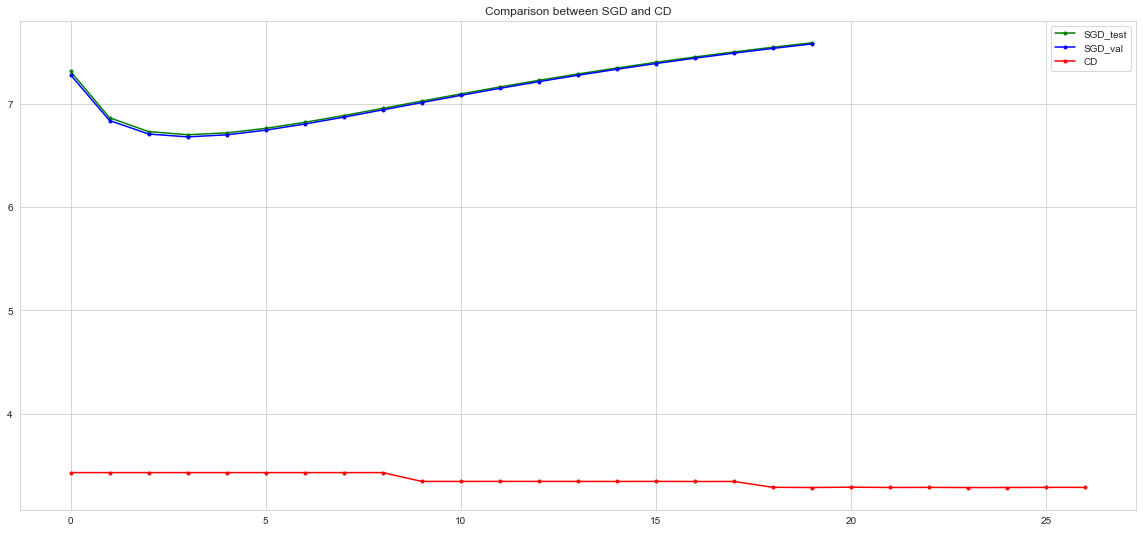

In [57]:
fig1,ax1 = plt.subplots(figsize=(20, 9))
ax1.plot(RMSE_test,'g.-')
ax1.plot(RMSE_val,'b.-')
ax1.plot(RMSE1,'r.-')
ax1.legend(['SGD_test','SGD_val','CD'])
plt.title('Comparison between SGD and CD')

From the graph it is clear that the SKlearn implementation performed better and we got a much lesser RMSE error at a faster rate. This is because the SKlearn library has been implemented well and I expected it to perform better than my implementation of which it did.